# Example 6: Thevenin and Norton

**Authors:**  
Sania Dolat, Ali Saadatpour  

**contacts:**  
its.saniadlt@gmail.com  
Qstzen@proton.me

**Thevenin** and **Norton** theorems are techniques used in circuit analysis.   
**Thevenin's theorem** simplifies a complex circuit to a single voltage source and a resistor, making analysis easier.    
**Norton’s theorem** simplifies the circuit to a current source and a parallel resistor.                      
Both methods provide equivalent circuits that produce the same voltage and current at the terminals when no load is attached. The Norton’s theorem is the dual of the Thévenin’s therorem and both are related by these equations: 

$$
\begin{split}\begin{align}
  R_{no} & = R_{th} \\
  I_{no} & = V_{th} / R_{th} \\
  V_{th} & = I_{No} R_{no}
\end{align}\end{split}
$$

A picture below is the circuit we want to analyse for Thevinan and Norton theorems


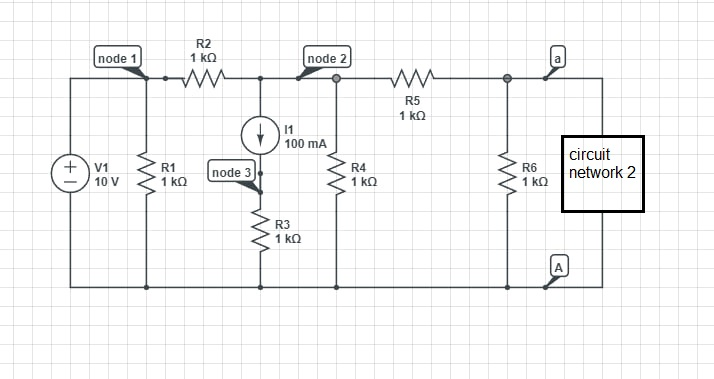

#### Imports

In [1]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

from PySpice.Logging.Logging import setup_logging
setup_logging()

<Logger PySpice (INFO)>

## Thevenin Circuit

In [2]:
thevenin_circuit = Circuit('Example Circuit') # create thevenin_circuit instance 

For applying Thevenin theorem in circuit above, we need to add the components base on the circuit depicted below

![Open Circuit for Norton.jpg](<attachment:Open Circuit for Norton.jpg>)
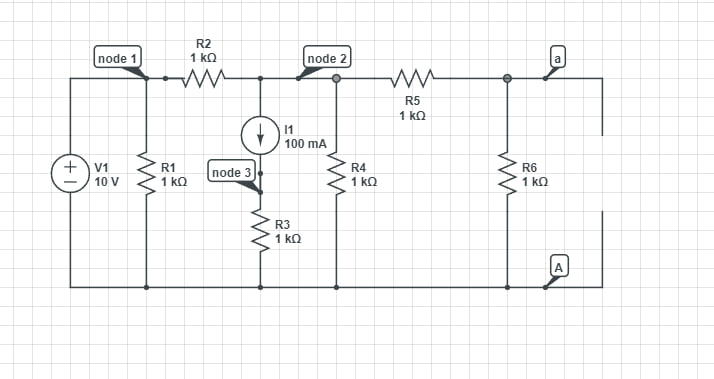

In [3]:
# Voltage source
thevenin_circuit.V(1, 1, thevenin_circuit.gnd, 10@u_V)  # 10V between node 1 and ground

# Current source
thevenin_circuit.I(1, 2, 3, 100@u_mA)  # 0.1A current source between node 2 and node 3

# Resistors
thevenin_circuit.R(1, 1, thevenin_circuit.gnd, 1@u_kΩ)  # R1 = 1k ohm between node 1 and ground
thevenin_circuit.R(2, 1, 2, 1@u_kΩ)            # R2 = 1k ohm between node 1 and node 2
thevenin_circuit.R(3, 3, thevenin_circuit.gnd, 1@u_kΩ)  # R3 = 1k ohm between node 3 and ground
thevenin_circuit.R(4, 2, thevenin_circuit.gnd, 1@u_kΩ)  # R4 = 1k ohm between node 2 and ground
thevenin_circuit.R(5, 2, 'a', 1@u_kΩ)            # R5 = 1k ohm between node 2 and node 4
thevenin_circuit.R(6, thevenin_circuit.gnd, 'a', 1@u_kΩ)  # R6 = 1k ohm between node 4 and ground

Resistor R6

After adding components to the circuit, we need to simulate and analyse the circuit

In [4]:
for resistance in (thevenin_circuit.R1, thevenin_circuit.R2, thevenin_circuit.R3, thevenin_circuit.R4, thevenin_circuit.R5, thevenin_circuit.R6):
    resistance.plus.add_current_probe(thevenin_circuit)
    
# for resistance in (thevenin_circuit.R1, thevenin_circuit.R2, thevenin_circuit.R3, thevenin_circuit.R4, thevenin_circuit.R5, thevenin_circuit.R6):
#     resistance.minus.add_current_probe(thevenin_circuit)

simulator = thevenin_circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

2024-09-12 15:13:26,055 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.ERROR - Note: can't find the initialization file spinit.
2024-09-12 15:13:26,057 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.WARNING - Unsupported Ngspice version 41


Let's plot the voltages and currents for each branch and node

In [5]:
print('--------------------------------Voltages---------------------------------')
for node in ('1', '2', '3', 'a'):
    print(f'Node {node} voltage: {float(analysis[node]):.2f} V')
print('--------------------------------Current----------------------------------')
for node in analysis.branches.values():
    simplified_node = str(node).replace('_plus', '')
    print('Node {}: {:5.3f} mA'.format(str(simplified_node), float(node*1000)))

--------------------------------Voltages---------------------------------
Node 1 voltage: 10.00 V
Node 2 voltage: -36.00 V
Node 3 voltage: 100.00 V
Node a voltage: -18.00 V
--------------------------------Current----------------------------------
Node v1: -56.000 mA
Node vr1: 10.000 mA
Node vr2: 46.000 mA
Node vr3: 100.000 mA
Node vr4: -36.000 mA
Node vr5: -18.000 mA
Node vr6: 18.000 mA


C:\Users\Sina\AppData\Local\Temp\ipykernel_9476\1284257669.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'Node {node} voltage: {float(analysis[node]):.2f} V')
C:\Users\Sina\AppData\Local\Temp\ipykernel_9476\1284257669.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Node {}: {:5.3f} mA'.format(str(simplified_node), float(node*1000)))


As you can see the Thevenin voltage is equal to -18.00 V

In [7]:
thevenin_voltage = float(analysis.nodes['a'])
thevenin_voltage

C:\Users\Sina\AppData\Local\Temp\ipykernel_9476\357230956.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  thevenin_voltage = float(analysis.nodes['a'])


-18.000000000000004

## Norton Circuit

In [9]:
norton_circuit = Circuit('Example Circuit') # create norton_circuit instance 

Now let's apply the Norton theorem for the circuit. For this we need to add the components base on the circuit depicted below

![Short Circuit for Norton.jpg](<attachment:Short Circuit for Norton.jpg>)

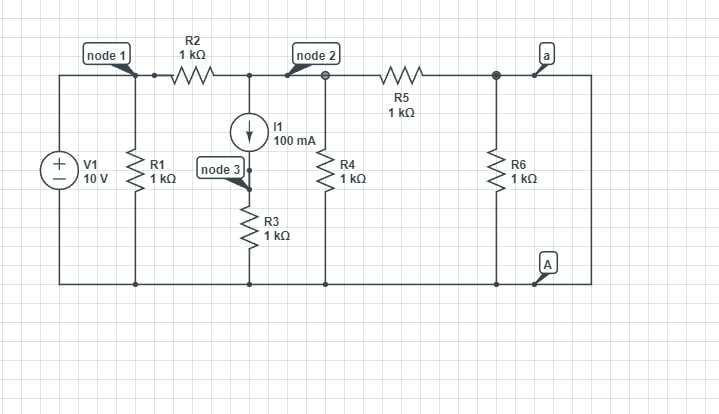

In [10]:
# Voltage source
norton_circuit.V(1, 1, norton_circuit.gnd, 10@u_V)  # 10V between node 1 and ground

# Current source
norton_circuit.I(1, 2, 3, 100@u_mA)  # 0.1A current source between node 2 and node 3

# Resistors
norton_circuit.R(1, 1, norton_circuit.gnd, 1@u_kΩ)  # R1 = 1k ohm between node 1 and ground
norton_circuit.R(2, 1, 2, 1@u_kΩ)            # R2 = 1k ohm between node 1 and node 2
norton_circuit.R(3, 3, norton_circuit.gnd, 1@u_kΩ)  # R3 = 1k ohm between node 3 and ground
norton_circuit.R(4, 2, norton_circuit.gnd, 1@u_kΩ)  # R4 = 1k ohm between node 2 and ground
norton_circuit.R(5, 2, norton_circuit.gnd, 1@u_kΩ)            # R5 = 1k ohm between node 2 and node 4
norton_circuit.R(6, norton_circuit.gnd, norton_circuit.gnd, 1@u_kΩ)  # R6 = 1k ohm between node 4 and ground

Resistor R6

After adding components to the circuit, we need to simulate and analyse the circuit

In [11]:
for resistance in (norton_circuit.R1, norton_circuit.R2, norton_circuit.R3, norton_circuit.R4, norton_circuit.R5, norton_circuit.R6):
    resistance.plus.add_current_probe(norton_circuit)
    
# for resistance in (norton_circuit.R1, norton_circuit.R2, norton_circuit.R3, norton_circuit.R4, norton_circuit.R5, norton_circuit.R6):
#     resistance.minus.add_current_probe(norton_circuit)

simulator = norton_circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

Let's plot the voltages and currents for each branch and node

In [12]:
print('--------------------------------Voltages---------------------------------')
for node in ('1', '2', '3'):
    print(f'Node {node} voltage: {float(analysis[node]):.2f} V')
print('--------------------------------Current----------------------------------')
for node in analysis.branches.values():
    simplified_node = str(node).replace('_plus', '')
    print('Node {}: {:5.3f} mA'.format(str(simplified_node), float(node*1000)))

--------------------------------Voltages---------------------------------
Node 1 voltage: 10.00 V
Node 2 voltage: -30.00 V
Node 3 voltage: 100.00 V
--------------------------------Current----------------------------------
Node v1: -50.000 mA
Node vr1: 10.000 mA
Node vr2: 40.000 mA
Node vr3: 100.000 mA
Node vr4: -30.000 mA
Node vr5: -30.000 mA
Node vr6: 0.000 mA


C:\Users\Sina\AppData\Local\Temp\ipykernel_9476\3431291225.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'Node {node} voltage: {float(analysis[node]):.2f} V')
C:\Users\Sina\AppData\Local\Temp\ipykernel_9476\3431291225.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Node {}: {:5.3f} mA'.format(str(simplified_node), float(node*1000)))


As you can see the Norton current is equal to 30.00 mA

In [29]:
norton_current = float(analysis.branches['vr5_plus'])*1000
norton_current

C:\Users\Computer2000\AppData\Local\Temp\ipykernel_19704\1592136020.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  norton_current = float(analysis.branches['vr5_plus'])*1000


-30.000000000000007

The Thevenin voltage of this circuit is equal to -18.00 V and the Norton current is equal to 30.00 mA. Now we need to calculate the R_th (Thevenin resistor).


In [30]:
R_eq = abs(thevenin_voltage/norton_current)
print(f'Result: {R_eq:.1f}')

Result: 0.6


Now that we calculate the Thevenin voltage, Norton current and R_eq we can simplify the circuit using Thevenin and Norton theorem.

## **Thevenin Circuit**

![equivalent to Thevenin .jpg](<attachment:equivalent to Thevenin .jpg>)
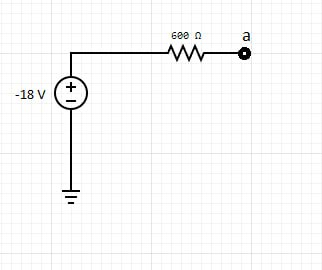

## **Norton Circuit**

![equivalent to Norton.jpg](<attachment:equivalent to Norton.jpg>)
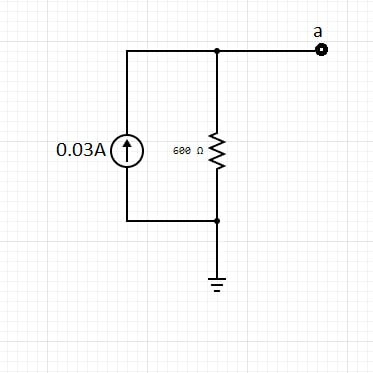